In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Convolutional Layer - Buiding block of CNN

TensorFlow Implementation

In [2]:
import numpy as np
from sklearn.datasets import load_sample_images

Now, we will load 2 color images into a dataset with the shape of a mini-batch.

In [3]:
dataset = np.array(load_sample_images().images, dtype = np.float32)
batch_size, height, width, channels = dataset.shape

C:\Users\manog\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\manog\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


Now, we will create two 7*7 filters(one with a vertical white line in the middle and, the other one with an horizontal white line in the middle).

In [4]:
filters_test = np.zeros(shape = (7, 7, channels, 2), dtype = np.float32)
filters_test[:, 3, :, 0] = 1    #vertical line
filters_test[3, :, :, 1] = 1    #horizontal line

Now, we will create a graph with input placeholder X of shape same as that of dataset and, apply the above created filters to the input images using a convolutional layer built using TensorFlow's conv2d() function (with zero padding and a stride of 2).

In [5]:
import tensorflow as tf

In [6]:
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
convolution = tf.nn.conv2d(X, filters_test, strides = [1, 2, 2, 1], padding = "SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict = {X : dataset})

Now, we will plot 1st image's 2 feature maps

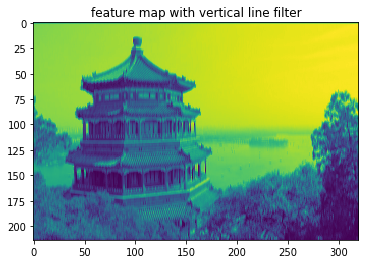

In [7]:
plt.imshow(output[0, :, :, 0])    #plots 1st image's 1st feature map
plt.title("feature map with vertical line filter")
plt.show()

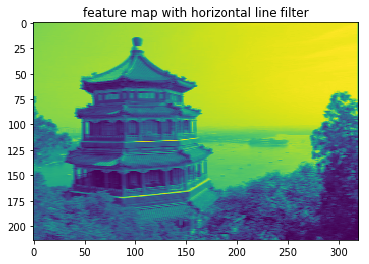

In [8]:
plt.imshow(output[0, :, :, 1])    #plots 1st image's 2nd feature map
plt.title("feature map with horizontal line filter")
plt.show()

Pooling Layer - Building block of CNN

TensorFlow Implementation

Now, we will again load the 2 color images into a datasetwith the shape of a mini-batch and then, create a graph with input placeholder X and apply max pooling layer to the input images using TensorFlow's max_pool() function (with 2*2 kernel, stride of 2 and no padding).

In [9]:
dataset = np.array(load_sample_images().images, dtype = np.float32)
batch_size, height, weight, channels = dataset.shape

C:\Users\manog\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\manog\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [10]:
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "VALID")

In [11]:
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict = {X : dataset})

Now, we will plot the 1st image's output.

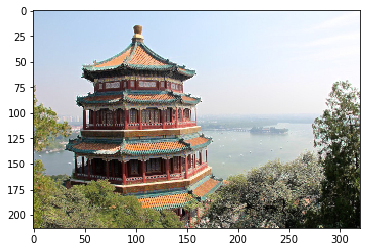

In [12]:
plt.imshow(output[0].astype(np.uint8))
plt.show()

Now, we will apply average pooling layer and the same implementation.

In [13]:
dataset = np.array(load_sample_images().images, dtype = np.float32)
batch_size, height, weight, channels = dataset.shape

C:\Users\manog\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\manog\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [14]:
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
avg_pool = tf.nn.avg_pool(X, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "VALID")

with tf.Session() as sess:
    output = sess.run(avg_pool, feed_dict = {X : dataset})

Now, we will plot the corresponding output for this implementation.

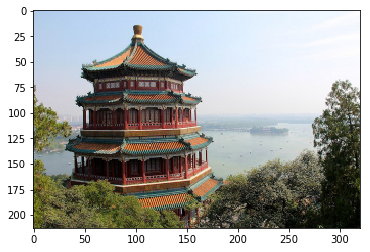

In [15]:
plt.imshow(output[0].astype(np.uint8))
plt.show()

CNN Architectures:
    1. LeNet-5
    2. AlexNet
    3. GoogLeNet
    4. ResNet (Residual Network)